# Pronostico con modelos del clima

In [1]:
import matplotlib.pyplot as plt

# built in python modules
import datetime
import os

# python add-ons
import numpy as np
import pandas as pd

# for accessing UNIDATA THREDD servers
from siphon.catalog import TDSCatalog
from siphon.ncss import NCSS

import pvlib
from pvlib.forecast import GFS, HRRR_ESRL, NAM, NDFD, HRRR, RAP

/Users/luisvargas/Desktop/Tesis Pvlib/env_pvlib_tesis/lib/python3.8/site-packages/pvlib/forecast.py:18: UserWarning: The forecast module algorithms and features are highly experimental. The API may change, the functionality may be consolidated into an io module, or the module may be separated into its own package.
  warnings.warn(


In [2]:
# Choose a location and time.
# Tucson, AZ
latitude = 20.56
longitude = -103.22 
tz = 'America/Mexico_City'

start = pd.Timestamp(datetime.date.today(), tz=tz) # today's date
end = start + pd.Timedelta(days=5) # 5 days from today
print(start, end)

2020-11-19 00:00:00-06:00 2020-11-24 00:00:00-06:00


###  GFS

In [3]:
from pvlib.forecast import GFS, HRRR_ESRL, NAM, NDFD, HRRR, RAP 

In [4]:
# GFS model, defaults to 0.5 degree resolution
fm = GFS()

    GFS(ForecastModel)
    Subclass of the ForecastModel class representing GFS
    forecast model.

    Model data corresponds to 0.25 degree resolution forecasts.

    Parameters
    ----------
    resolution: string, default 'half'
        Resolution of the model, either 'half' or 'quarter' degree.
    set_type: string, default 'best'
        Type of model to pull data from.

    Attributes
    ----------
    dataframe_variables: list
        Common variables present in the final set of data.
    model: string
        Name of the UNIDATA forecast model.
    model_type: string
        UNIDATA category in which the model is located.
    variables: dict
        Defines the variables to obtain from the weather
        model and how they should be renamed to common variable names.
    units: dict
        Dictionary containing the units of the standard variables
        and the model specific variables.

In [5]:
#Conseguir los datos para el sitio dado
data = fm.get_data(latitude, longitude, start, end)

In [6]:
data[sorted(data.columns)]

,Downward_Short-Wave_Radiation_Flux_surface_Mixed_intervals_Average,Temperature_surface,Total_cloud_cover_boundary_layer_cloud_Mixed_intervals_Average,Total_cloud_cover_convective_cloud,Total_cloud_cover_entire_atmosphere_Mixed_intervals_Average,Total_cloud_cover_high_cloud_Mixed_intervals_Average,Total_cloud_cover_low_cloud_Mixed_intervals_Average,Total_cloud_cover_middle_cloud_Mixed_intervals_Average,Wind_speed_gust_surface,u-component_of_wind_isobaric,v-component_of_wind_isobaric
2020-11-19 06:00:00-06:00,0.0,286.299408,0.0,0.0,0.0,0.0,0.0,0.0,2.456148,-1.957319,-1.388037
2020-11-19 09:00:00-06:00,0.0,284.178070,0.0,0.0,0.0,0.0,0.0,0.0,2.433794,-0.977971,-1.711174
2020-11-19 12:00:00-06:00,0.0,282.439056,0.0,0.0,0.0,0.0,0.0,0.0,1.842078,-1.483960,-1.049988
2020-11-19 15:00:00-06:00,110.0,290.200012,0.0,0.0,0.0,0.0,0.0,0.0,5.744560,-2.492078,-0.948362
2020-11-19 18:00:00-06:00,380.0,300.951263,0.0,0.0,0.0,0.0,0.0,0.0,5.040967,-3.185098,-1.168875
2020-11-19 21:00:00-06:00,780.0,302.551270,0.0,0.0,0.0,0.0,0.0,0.0,4.057886,-2.374500,-1.924512
2020-11-20 00:00:00-06:00,554.0,291.840393,0.0,0.0,0.0,0.0,0.0,0.0,1.931459,-1.312888,-1.358215
2020-11-20 03:00:00-06:00,0.0,287.281860,0.0,0.0,0.0,0.0,0.0,0.0,1.342121,-1.181921,-0.687544
2020-11-20 06:00:00-06:00,0.0,286.101135,0.0,0.0,0.0,0.0,0.0,0.0,2.122488,-1.777825,-1.139426
2020-11-20 09:00:00-06:00,0.0,283.653809,0.0,0.0,0.0,0.0,0.0,0.0,1.867908,-1.104631,-1.469155


In [7]:
data = fm.process_data(data)

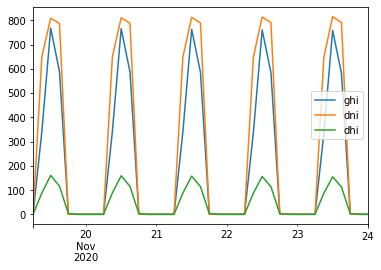

In [8]:
data[['ghi', 'dni', 'dhi']].plot();

In [9]:
#modelo de cielo despejado
cs = fm.location.get_clearsky(data.index)

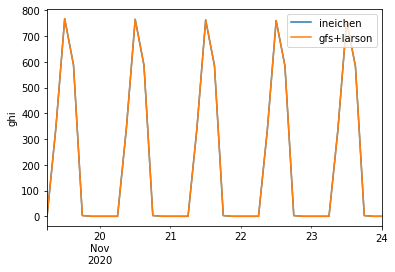

In [10]:
fig, ax = plt.subplots()
cs['ghi'].plot(ax=ax, label='ineichen')
#Larson et. al. "Day-ahead forecasting of solar power output from photovoltaic plants in the American Southwest" Renewable Energy91, 11-20 (2016).
data['ghi'].plot(ax=ax, label='gfs+larson')
ax.set_ylabel('ghi')
ax.legend();

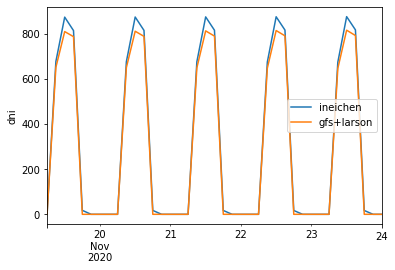

In [11]:
fig, ax = plt.subplots()
cs['dni'].plot(ax=ax, label='ineichen')
data['dni'].plot(ax=ax, label='gfs+larson')
ax.set_ylabel('dni')
ax.legend();

In [12]:
#Datos obtenidos y procesados
data = fm.get_processed_data(latitude, longitude, start, end)

In [13]:
data[sorted(data.columns)]

,dhi,dni,ghi,high_clouds,low_clouds,mid_clouds,temp_air,total_clouds,wind_speed
2020-11-19 06:00:00-06:00,0.000000,0.000000,0.000000,0.0,0.0,0.0,13.149414,0.0,2.399530
2020-11-19 09:00:00-06:00,88.481066,650.643739,343.952733,0.0,0.0,0.0,11.028076,0.0,1.970925
2020-11-19 12:00:00-06:00,160.423460,808.881342,767.837346,0.0,0.0,0.0,9.289062,0.0,1.817859
2020-11-19 15:00:00-06:00,115.883761,786.443057,587.848969,0.0,0.0,0.0,17.050018,0.0,2.666429
2020-11-19 18:00:00-06:00,3.175885,0.000000,3.175885,0.0,0.0,0.0,27.801270,0.0,3.392803
2020-11-19 21:00:00-06:00,0.000000,0.000000,0.000000,0.0,0.0,0.0,29.401276,0.0,3.056468
2020-11-20 00:00:00-06:00,0.000000,0.000000,0.000000,0.0,0.0,0.0,18.690399,0.0,1.889027
2020-11-20 03:00:00-06:00,0.000000,0.000000,0.000000,0.0,0.0,0.0,14.131866,0.0,1.367353
2020-11-20 06:00:00-06:00,0.000000,0.000000,0.000000,0.0,0.0,0.0,12.951141,0.0,2.111623
2020-11-20 09:00:00-06:00,88.001886,649.493223,341.221852,0.0,0.0,0.0,10.503815,0.0,1.838104


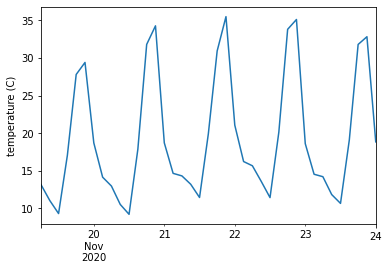

In [14]:
data['temp_air'].plot()
plt.ylabel('temperature (%s)' % fm.units['temp_air']);

In [15]:
#Variables de nubosidad
cloud_vars = ['total_clouds', 'low_clouds', 'mid_clouds', 'high_clouds']

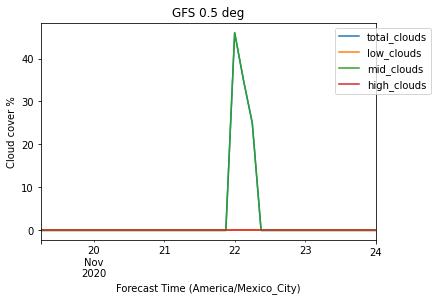

In [16]:
for varname in cloud_vars:
    data[varname].plot()
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('GFS 0.5 deg')
plt.legend(bbox_to_anchor=(1.18,1.0));

In [17]:
total_cloud_cover = data['total_clouds']

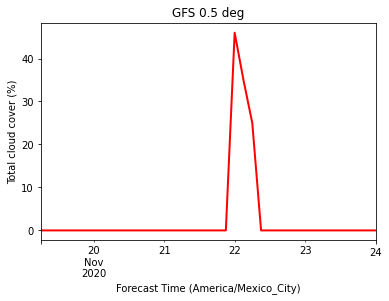

In [18]:
total_cloud_cover.plot(color='r', linewidth=2)
plt.ylabel('Total cloud cover' + ' (%s)' % fm.units['total_clouds'])
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('GFS 0.5 deg');